#### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

In [2]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 2] No such
[nltk_data]     file or directory>


False

#### Importing dataset using pandas

In [3]:
## loading the dataset from csv format to pandas dataframe
df=pd.read_csv('mail_data.csv')

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Explonatory Data Analysis

In [5]:
## checking for the shape of the dataset
df.shape

(5572, 2)

In [6]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
## Using groupby to describe based on different category
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [8]:
## checking for the null values in the dataset
df.isnull().sum()

Category    0
Message     0
dtype: int64

There are no missing values in the dataset

In [9]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

#### Feature Engineering

In [10]:
## creating new feature that containing the length of the text message
df['length'] = df['Message'].apply(len)
df.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#### Data Visualizations

<Axes: ylabel='Frequency'>

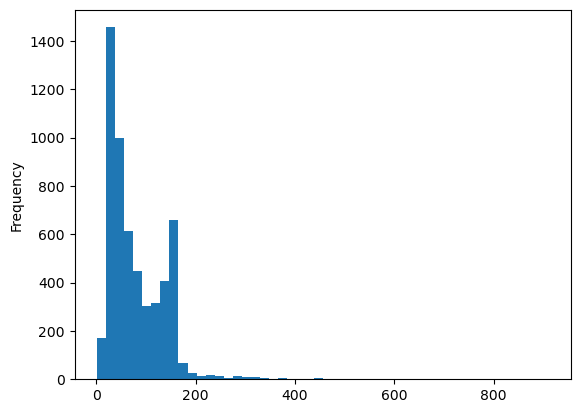

In [11]:
df['length'].plot(bins=50, kind='hist') 

From the above histogram we can see that the x-axis goes all the way to 800th, this must mean that there is some really long message!

In [12]:
df.length.describe()

count    5572.000000
mean       80.368988
std        59.926946
min         2.000000
25%        35.750000
50%        61.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

* We can see that the maximum length of the message i.e. lenght of long message is 910 characters

In [13]:
## finding that long message using pandas functions
df[df['length'] == 910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

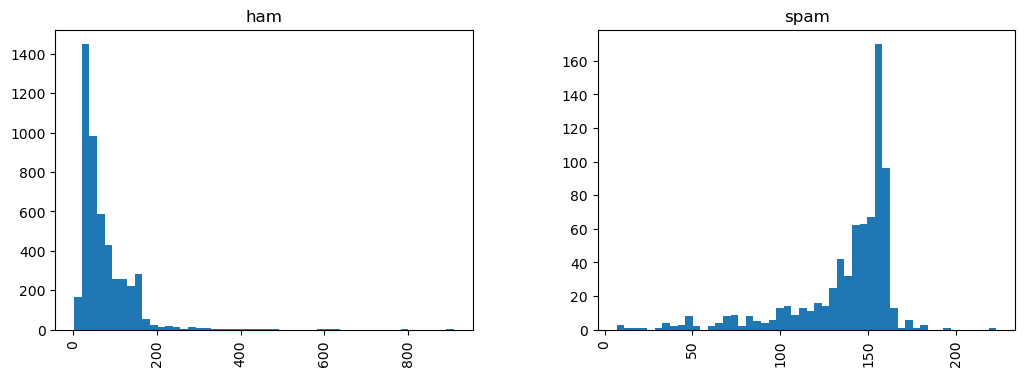

In [14]:
## describing a histogram that gives the length of ham and spam mails
df.hist(column='length', by='Category', bins=50,figsize=(12,4))

* From this we can say that the length of spam mail is more that ham ones

#### Text Pre-Processing

In [15]:
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text

In [16]:
def text_process(mess):
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Now we will convert the normal text strings in to a list of words that we actually want(by removing if any stopwords are present).

In [17]:
# Check to make sure its working
df['Message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [18]:
# Show original dataframe
df.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#### Vectorization

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Message'])
## Here I passed analyzer as a function which is previously defined


In [21]:
# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11422


In [22]:
## Let's take one text message and get its bag-of-words counts as a vector, putting to use our new `bow_transformer`:
Message4 = df['Message'][289]
print(Message4)

My life Means a lot to me, Not because I love my life, But because I love the people in my life, The world calls them friends, I call them my World:-).. Ge:-)..


In [23]:
## Now let's see its vector representation:
bow4 = bow_transformer.transform([Message4])
print(bow4)
print(bow4.shape)

  (0, 2036)	1
  (0, 2805)	1
  (0, 4345)	1
  (0, 5272)	1
  (0, 5294)	1
  (0, 6716)	1
  (0, 7783)	3
  (0, 7894)	1
  (0, 7910)	2
  (0, 8791)	1
  (0, 11160)	1
(1, 11422)


From the above we can say that there are seven unique words in message number 4 (after removing common stop words). Two of them appear twice, the rest only once

In [24]:
## now checking which words appeared thrice
print(bow_transformer.get_feature_names_out()[7783])

life


In [25]:
## Now using .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame
df_bow = bow_transformer.transform(df['Message'])

In [26]:
print('Shape of Sparse Matrix: ', df_bow.shape)
print('Amount of Non-Zero occurences: ', df_bow.nnz)

Shape of Sparse Matrix:  (5572, 11422)
Amount of Non-Zero occurences:  50500


In [27]:
sparsity = (100.0 * df_bow.nnz / (df_bow.shape[0] * df_bow.shape[1]))


In [28]:
print('sparsity: {}'.format(sparsity))

sparsity: 0.07934838914285262


#### TF - Term Frequency and IDF - Inverse Document Frequency

Count how many times does a word occur in each message (Known as term frequency)

Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(df_bow)


In [30]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 11160)	0.23577340044787334
  (0, 8791)	0.2061572491585725
  (0, 7910)	0.3420371535584216
  (0, 7894)	0.21747283061741618
  (0, 7783)	0.6019041842055349
  (0, 6716)	0.2069114975111779
  (0, 5294)	0.2393589377368852
  (0, 5272)	0.1332824740599033
  (0, 4345)	0.2661282474637628
  (0, 2805)	0.30548655286188686
  (0, 2036)	0.30548655286188686


In [31]:
## transforming the entire bag-of-words corpus into TF-IDF corpus at once
df_tfidf = tfidf_transformer.transform(df_bow)
print(df_tfidf.shape)

(5572, 11422)


#### Training a model

In [32]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(df_tfidf, df['Category'])

In [33]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', df.Category[3])

predicted: ham
expected: ham


#### model evaluation

In [34]:
all_predictions = spam_detect_model.predict(df_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [35]:
from sklearn.metrics import classification_report
print (classification_report(df['Category'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



#### Train Test Split

In [36]:
Msg_train, Msg_test, Category_train, Category_test = train_test_split(df['Message'], df['Category'], test_size=0.2)

In [37]:
print(len(Msg_train), len(Msg_test), len(Category_train) + len(Category_test))

4457 1115 5572


#### Creating a Data Pipeline
Here including all the transformations to the data into a piple line to execute all at a once 

In [38]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

#### using that pipeline which we created to use on our dataset

In [39]:
## passing the trained set of messages into the pipeline which will do all necessary transformations we predefined
pipeline.fit(Msg_train,Category_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001FDCC227B50>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [40]:
predictions = pipeline.predict(Msg_test)

In [41]:
print(classification_report(predictions,Category_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1017
        spam       0.69      1.00      0.81        98

    accuracy                           0.96      1115
   macro avg       0.84      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115



#### Testing the model with random messages to predict whether it is ham or spam

In [42]:
TestMessage1='''Subject: Exclusive Offer - Limited Time Only! 
Congratulations! You've been selected for an exclusive offer to win a luxury vacation. Click the link below to claim your prize now.'''

In [43]:
pipeline.predict([TestMessage1])

array(['spam'], dtype='<U4')

The model detected the message as spam which is correct prediction

In [44]:
TestMessage2='''Subject: Meeting Tomorrow
Hi Andrew,
Just a reminder that we have a team meeting scheduled for tomorrow at 10 AM in the conference room. Please be prepared to discuss your project updates.
Thanks,
[Your Supervisor's Name]
'''

In [45]:
pipeline.predict([TestMessage2])

array(['ham'], dtype='<U4')

The model detected the message as ham which is correct prediction

#### Now using this pipeline we can easily check whether a message or email is spam or ham